# E-commerce Order Prediction Project


# Overview

This project aims to predict order patterns in an e-commerce setting using machine learning techniques. The dataset used for analysis is the Amazon sales dataset, which contains information about various orders placed on the Amazon platform.

# Dataset

The dataset comprises sales data from Amazon, including attributes such as order ID, date, status, fulfillment method, sales channel, product details, quantity, currency, amount, shipping details, and more. It provides valuable insights into customer purchasing behavior and order fulfillment processes.




# Project Phase - 1

Data Loading and Exploration: In this phase, we'll load the dataset, explore its structure, and perform initial data analysis to understand the underlying patterns and relationships.

# Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification


In [3]:
os.chdir("C:\\Users\\kural\\OneDrive\\Desktop\\E-commerce dataset")

In [4]:
df = pd.read_csv("Amazon Sale Report.csv")
df.head()

C:\Users\kural\AppData\Local\Temp\ipykernel_9188\3949281228.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Amazon Sale Report.csv")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [5]:
# Removing unwanted columns from the table

df = df.drop(labels = ['index' , 'Order ID', 'Unnamed: 22', 'ship-postal-code', 'promotion-ids'], axis = 1)
df.head()

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-country,B2B,fulfilled-by
0,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,IN,False,Easy Ship
1,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,IN,False,Easy Ship
2,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,IN,True,NaN
3,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,IN,False,Easy Ship
4,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,IN,False,NaN


In [6]:
df.shape

(128975, 19)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Qty,128975.0,0.904431,0.313354,0.0,1.0,1.0,1.0,15.0
Amount,121180.0,648.561465,281.211687,0.0,449.0,605.0,788.0,5584.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                128975 non-null  object 
 1   Status              128975 non-null  object 
 2   Fulfilment          128975 non-null  object 
 3   Sales Channel       128975 non-null  object 
 4   ship-service-level  128975 non-null  object 
 5   Style               128975 non-null  object 
 6   SKU                 128975 non-null  object 
 7   Category            128975 non-null  object 
 8   Size                128975 non-null  object 
 9   ASIN                128975 non-null  object 
 10  Courier Status      122103 non-null  object 
 11  Qty                 128975 non-null  int64  
 12  currency            121180 non-null  object 
 13  Amount              121180 non-null  float64
 14  ship-city           128942 non-null  object 
 15  ship-state          128942 non-nul

In [9]:
df.dtypes

Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-country           object
B2B                      bool
fulfilled-by           object
dtype: object

In [10]:
df.isnull().sum()

Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-country             33
B2B                       0
fulfilled-by          89698
dtype: int64

In [11]:
df.shape

(128975, 19)

In [13]:
(df.isnull().sum()/df.shape[0])*100

Date                   0.000000
Status                 0.000000
Fulfilment             0.000000
Sales Channel          0.000000
ship-service-level     0.000000
Style                  0.000000
SKU                    0.000000
Category               0.000000
Size                   0.000000
ASIN                   0.000000
Courier Status         5.328164
Qty                    0.000000
currency               6.043807
Amount                 6.043807
ship-city              0.025586
ship-state             0.025586
ship-country           0.025586
B2B                    0.000000
fulfilled-by          69.546811
dtype: float64

In [15]:
df.isnull().sum().sum()

112259

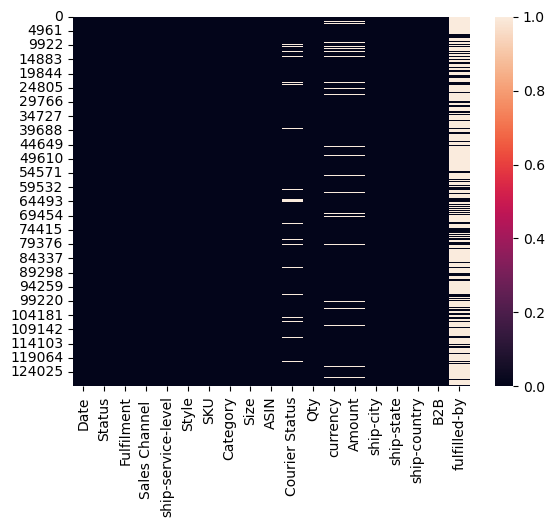

In [16]:
sns.heatmap(df.isnull())
plt.show()

In [17]:
# Fill missing values
df.fillna(method ='bfill',inplace = True)
df["fulfilled-by"].fillna(method ='ffill',inplace = True)

In [18]:
df.isnull().sum()

Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [19]:
# finding the unique values in different columns


In [20]:
unique_values1 = df['Status'].unique()
unique_values1

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [21]:
unique_values2 = df['Fulfilment'].unique()
unique_values2

array(['Merchant', 'Amazon'], dtype=object)

In [22]:
unique_values3 = df['Sales Channel '].unique()
unique_values3

array(['Amazon.in', 'Non-Amazon'], dtype=object)

In [23]:
unique_values4 = df['ship-service-level'].unique()
unique_values4

array(['Standard', 'Expedited'], dtype=object)

In [24]:
unique_values5 = df['Category'].unique()
unique_values5

array(['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

In [25]:
unique_values6 = df['Size'].unique()
unique_values6

array(['S', '3XL', 'XL', 'L', 'XXL', 'XS', '6XL', 'M', '4XL', '5XL',
       'Free'], dtype=object)

In [26]:
unique_values7 = df['Courier Status'].unique()
unique_values7

array(['Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [27]:
unique_values8 = df['ship-city'].unique()
unique_values8

array(['MUMBAI', 'BENGALURU', 'NAVI MUMBAI', ...,
       'GULABPURA, Distt BHILWARA', 'Prayagraj (ALLAHABAD)', 'Halol'],
      dtype=object)

In [28]:
unique_values9 = df['ship-state'].unique()
unique_values9

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'Gujarat', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'MANIPUR', 'Goa', 'MEGHALAYA', 'GOA',
       'TRIPURA', 'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', 'Delhi',
       'ANDAMAN & NICOBAR ', 'Punjab', 'Rajshthan', 'Manipur',
       'rajasthan', 'Odisha', 'NL', 'Bihar', 'MIZORAM', 'punjab',
       'New Delhi', 'Rajasthan', 'Punjab/Mohali/Zirakpur', 'Puducherry',
       'delhi', 'RJ', 'Chandigarh', 'orissa', 'LAKSHADWEEP', 'goa', 'PB',
       'APO', 'Arunachal Pradesh', 'AR', 'Pondicherry', 'Sikkim',
       'Arunachal pradesh', 'Nagaland', 'bihar', 'Mizoram', 'rajsthan',
       'Orissa', 'Rajsthan', 'Meghalaya'], dtype=object)

In [29]:
unique_values10 = df['ship-country'].unique()
unique_values10

array(['IN'], dtype=object)

# Summary

In this phase, we loaded the Amazon sales dataset and conducted preliminary exploration to understand its structure and contents. We inspected various attributes such as order ID, date, status, fulfillment method, sales channel, product details, quantity, currency, amount, and shipping information.

# Key Insights

-Data Overview : The dataset contains 32395 rows and 20 columns.

-Attribute Types : We identified 16 categorical and numerical 2 attributes in the dataset.

-Missing Values : I droped all null values.

-Statistical Summary : We computed basic statistics such as mean, median, and standard deviation for numerical attributes.

# Project Phase - 2

EDA (Exploratory Data Analysis) : Here, we'll conduct in-depth exploratory data analysis, including visualizations, statistical summaries, and feature engineering to gain insights into the dataset.

# EDA(Exploratory Data Analysis)¶

In [31]:
# converting 'Date' datatype from object to Datetime.
df['Date'] = pd.to_datetime(df['Date']) 

In [32]:
df['month'] = df['Date'].dt.month
df['month'].unique()

array([4, 3, 5, 6], dtype=int64)

In [33]:
months = ['march','April', 'May', 'June']
df['month'].replace([3,4,5,6],months, inplace = True)

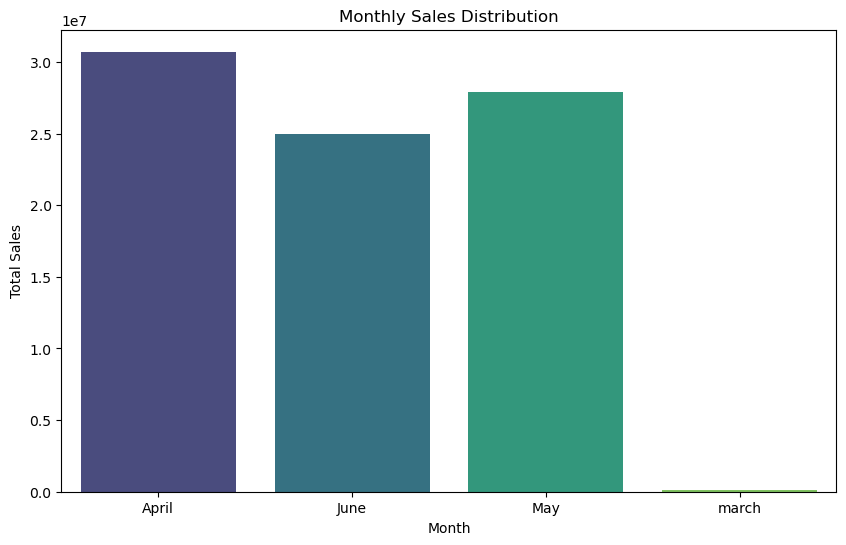

In [34]:
# 1. Monthly Sales Distribution
monthly_sales = df.groupby('month')['Amount'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')
plt.title('Monthly Sales Distribution')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

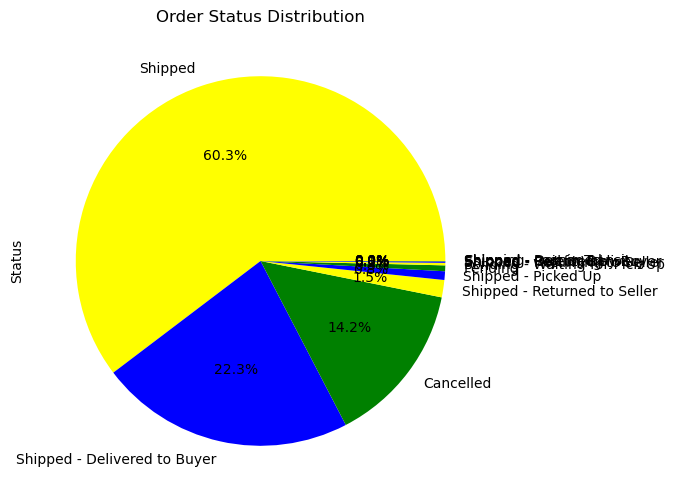

In [35]:
# 2. Order Status Distribution

order_status_dist = df['Status'].value_counts()
plt.figure(figsize=(8, 6))
order_status_dist.plot.pie(autopct='%1.1f%%', colors=['yellow','blue','green'])
plt.title('Order Status Distribution')
plt.show()

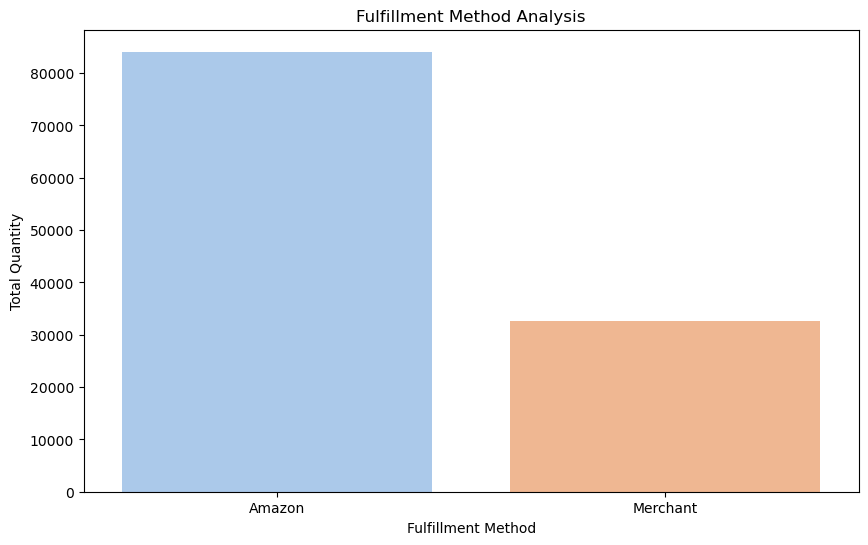

In [36]:
# 3. Fulfillment Method Analysis

fulfillment_method = df.groupby('Fulfilment')['Qty'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=fulfillment_method.index, y=fulfillment_method.values, palette='pastel')
plt.title('Fulfillment Method Analysis')
plt.xlabel('Fulfillment Method')
plt.ylabel('Total Quantity')
plt.show()

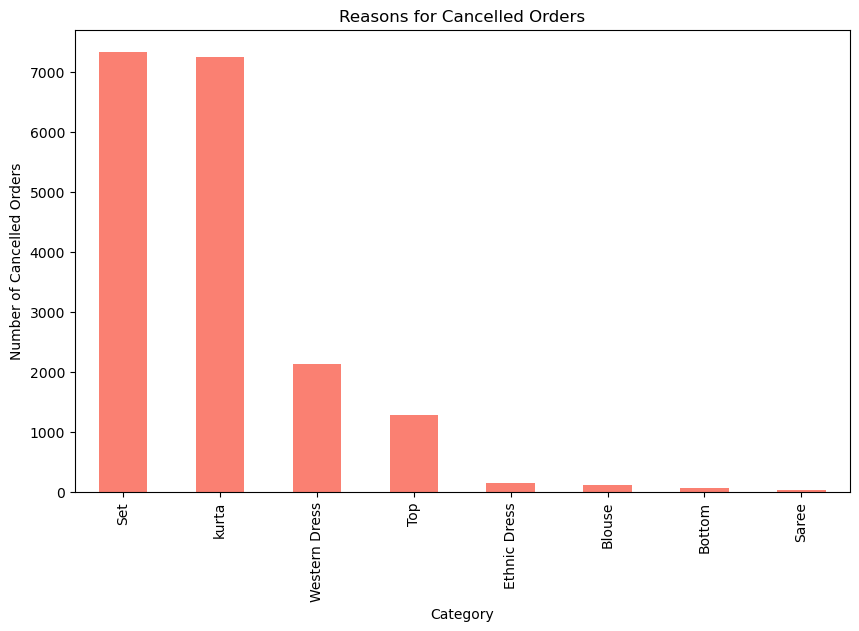

In [37]:
# 4. Cancelled Orders Analysis

cancelled_orders = df[df['Status'] == 'Cancelled']
cancelled_reasons = cancelled_orders.groupby('Category')['Qty'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
cancelled_reasons.plot.bar(color='salmon')
plt.title('Reasons for Cancelled Orders')
plt.xlabel('Category')
plt.ylabel('Number of Cancelled Orders')
plt.show()

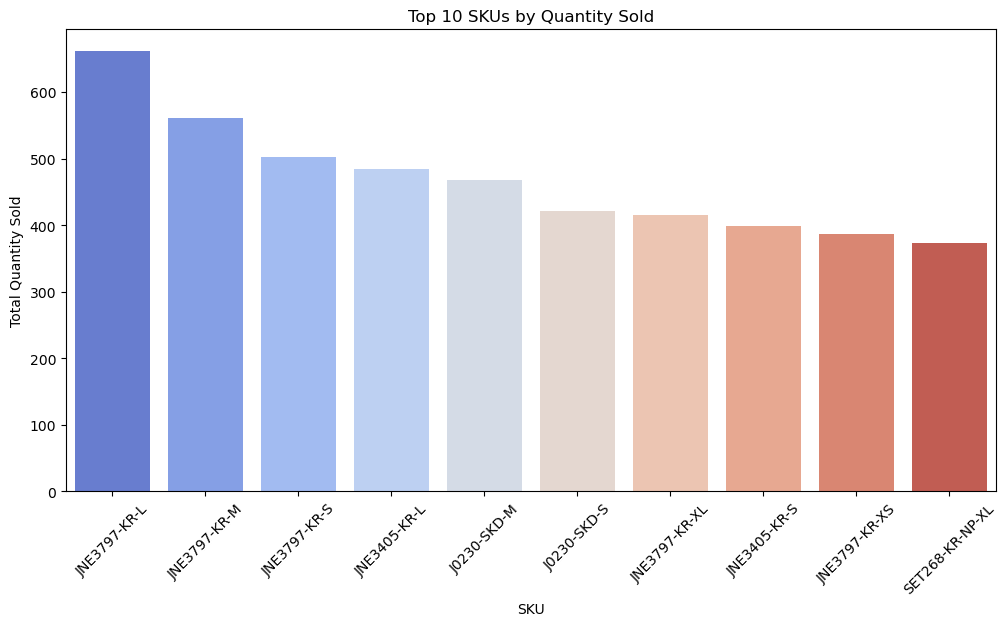

In [38]:
# 6. SKU-Level Analysis

top_skus = df.groupby('SKU')['Qty'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_skus.index, y=top_skus.values, palette='coolwarm')
plt.title('Top 10 SKUs by Quantity Sold')
plt.xlabel('SKU')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

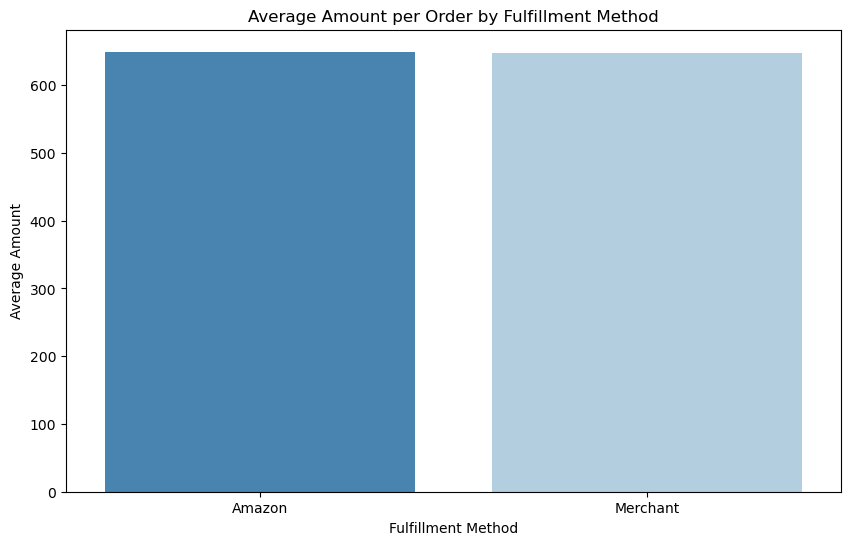

In [39]:
# 7. Average Amount per Order by Fulfillment Method

avg_amount_order = df.groupby('Fulfilment')['Amount'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_amount_order.index, y=avg_amount_order.values, palette='Blues_r')
plt.title('Average Amount per Order by Fulfillment Method')
plt.xlabel('Fulfillment Method')
plt.ylabel('Average Amount')
plt.show()

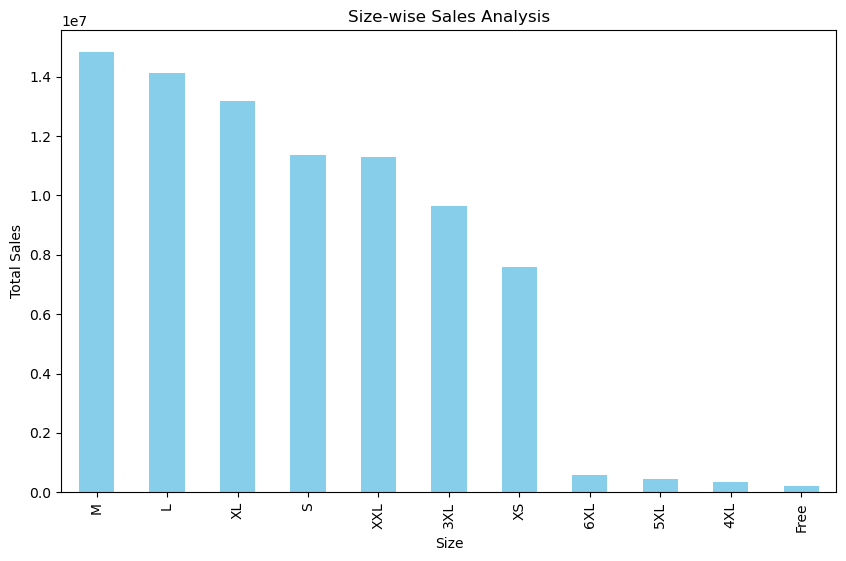

In [40]:
# 8. Size-wise Sales Analysis

size_sales = df.groupby('Size')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
size_sales.plot.bar(color='skyblue')
plt.title('Size-wise Sales Analysis')
plt.xlabel('Size')
plt.ylabel('Total Sales')
plt.show()

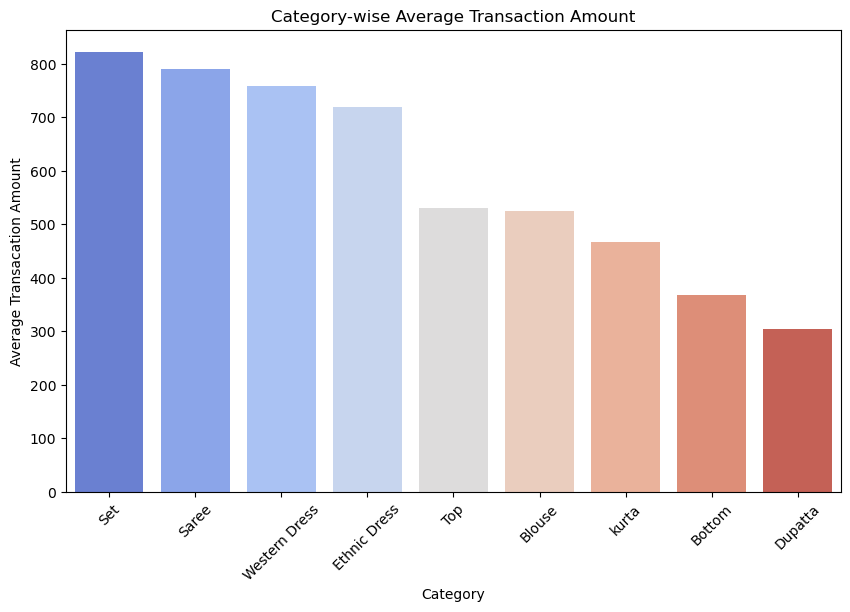

In [41]:
# 9. Category-wise Average Transaction Amount

avg_transaction_amount = df.groupby('Category')['Amount'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_transaction_amount.index, y=avg_transaction_amount.values, palette='coolwarm')
plt.title('Category-wise Average Transaction Amount')
plt.xlabel('Category')
plt.ylabel('Average Transacation Amount')
plt.xticks(rotation=45)
plt.show()

# Project Phase - 3

3. **Machine Learning Models**: In the final phase, we'll develop machine learning models to predict e-commerce order patterns based on the insights gained from the exploratory analysis. We'll evaluate the performance of various models and choose the most suitable one for deployment.

In [42]:
df = df.drop(labels = ['Date'], axis = 1)
df.head()

,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-country,B2B,fulfilled-by,month
0,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Shipped,0,INR,647.62,MUMBAI,MAHARASHTRA,IN,False,Easy Ship,April
1,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,IN,False,Easy Ship,April
2,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,IN,True,Easy Ship,April
3,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Shipped,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,IN,False,Easy Ship,April
4,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,IN,False,Easy Ship,April


In [54]:
df = df.drop(labels = ['month'], axis = 1)
df.head()

,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-country,B2B,fulfilled-by
0,0,1,1,1342,6992,5,7,5563,1,0,0,647.62,4795,28,0,0,0
1,5,1,1,847,4436,8,0,5277,1,1,0,406.00,776,23,0,0,0
2,3,0,0,533,2633,8,8,675,1,1,0,329.00,5353,28,0,1,0
3,0,1,1,373,1767,7,5,4638,1,0,0,753.33,6140,43,0,0,0
4,3,0,0,754,3837,6,0,4351,1,1,0,574.00,1466,56,0,0,0


In [43]:
df = df.drop(labels = ['Sales Channel '], axis = 1)
df.head()

,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-country,B2B,fulfilled-by,month
0,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Shipped,0,INR,647.62,MUMBAI,MAHARASHTRA,IN,False,Easy Ship,April
1,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,IN,False,Easy Ship,April
2,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,IN,True,Easy Ship,April
3,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Shipped,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,IN,False,Easy Ship,April
4,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,IN,False,Easy Ship,April


In [44]:
# Encode categorical column

In [45]:
df['B2B'] = label_encoder.fit_transform(df['B2B'])

df['Fulfilment'] = label_encoder.fit_transform(df['Fulfilment'])

df['ship-city'] = label_encoder.fit_transform(df['ship-city'])

df['ship-service-level'] = label_encoder.fit_transform(df['ship-service-level'])

df['Style'] = label_encoder.fit_transform(df['Style'])

df['SKU'] = label_encoder.fit_transform(df['SKU'])

df['Category'] = label_encoder.fit_transform(df['Category'])

df['Size'] = label_encoder.fit_transform(df['Size'])

In [46]:
df['ASIN'] = label_encoder.fit_transform(df['ASIN'])

df['currency'] = label_encoder.fit_transform(df['currency'])

df['ship-state'] = label_encoder.fit_transform(df['ship-state'])

df['fulfilled-by'] = label_encoder.fit_transform(df['fulfilled-by'])

In [47]:
df['Status'] = label_encoder.fit_transform(df['Status'])

df['Courier Status'] = label_encoder.fit_transform(df['Courier Status'])

df['ship-country'] = label_encoder.fit_transform(df['ship-country'])


In [48]:
df.head()

,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-country,B2B,fulfilled-by,month
0,0,1,1,1342,6992,5,7,5563,1,0,0,647.62,4795,28,0,0,0,April
1,5,1,1,847,4436,8,0,5277,1,1,0,406.00,776,23,0,0,0,April
2,3,0,0,533,2633,8,8,675,1,1,0,329.00,5353,28,0,1,0,April
3,0,1,1,373,1767,7,5,4638,1,0,0,753.33,6140,43,0,0,0,April
4,3,0,0,754,3837,6,0,4351,1,1,0,574.00,1466,56,0,0,0,April


In [49]:
# Linear Regression

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model


In [55]:
X = df.drop('Status',axis ='columns')
y = df.Status

In [52]:
reg = linear_model.LinearRegression()

In [56]:
reg.fit(X,y)

LinearRegression()

In [57]:
X_train , X_test , y_train , y_test = train_test_split(X,y,train_size = 0.3)

In [58]:
y_pred1 = reg.predict(X_test)
y_pred1

array([0.36892456, 2.91072775, 2.98054985, ..., 2.86617111, 3.00988916,
       2.99501999])

In [59]:
reg.score(X_test,y_test)

0.7701043459523195

In [61]:
print("Accuracy :",reg.score(X_test,y_test))

Accuracy : 0.7701043459523195


In [60]:
# Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
lr = LogisticRegression()

In [64]:
X_train , X_test , y_train , y_test = train_test_split(X,y,train_size = 0.3)

In [65]:
lr.fit(X_train , y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
y_pred2 = lr.predict(X_test)
y_pred2

array([3, 3, 3, ..., 3, 3, 3])

In [67]:
lr.predict_proba(X_test)

array([[1.85978753e-01, 2.62511180e-02, 3.29774016e-02, ...,
        5.83634316e-02, 2.77880340e-02, 1.68660707e-04],
       [1.85013939e-01, 4.35971470e-03, 1.25843901e-03, ...,
        1.49340059e-02, 1.67648434e-03, 2.19032080e-05],
       [8.72232855e-02, 8.65736143e-05, 1.22976180e-05, ...,
        1.04792525e-03, 9.33550399e-06, 9.63834589e-14],
       ...,
       [1.86681452e-01, 1.01368979e-02, 3.54599532e-03, ...,
        2.79138181e-02, 3.88741058e-03, 1.91465342e-05],
       [1.44099253e-01, 4.93268988e-03, 5.00047125e-04, ...,
        1.36933625e-02, 3.62415169e-04, 2.20667926e-10],
       [1.91798430e-01, 8.08324532e-03, 1.77583417e-03, ...,
        2.24175891e-02, 1.89091041e-03, 1.70856564e-06]])

In [68]:
lr.score(X_test,y_test)

0.6042555076814018

In [69]:
print("Accuracy :",lr.score(X_test,y_test))

Accuracy : 0.6042555076814018


In [ ]:
# Decision Tree

In [70]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()

In [72]:
X_train , X_test , y_train , y_test = train_test_split(X,y,train_size = 0.3)

In [73]:
dt.fit(X_train , y_train)

DecisionTreeClassifier()

In [74]:
y_pred3 = dt.predict(X_test)
y_pred3

array([5, 3, 0, ..., 3, 3, 5])

In [75]:
dt.score(X_test,y_test)

0.9453385465702292

In [76]:
print("Accuracy :",dt.score(X_test,y_test))

Accuracy : 0.9453385465702292


In [77]:
# Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 20)
rf.fit(X_train ,y_train)

RandomForestClassifier(n_estimators=20)

In [79]:
rf.score(X_test,y_test)

0.9671255939656414

In [80]:
print("Accuracy :",rf.score(X_test,y_test))

Accuracy : 0.9671255939656414


In [81]:
# SVM

In [82]:
from sklearn.svm import SVC
svc = SVC()

In [83]:
svc.fit(X_train ,y_train)

SVC()

In [88]:
svc.score(X_test,y_test)

0.6036352358694328

In [89]:
print("Accuracy :",svc.score(X_test,y_test))

Accuracy : 0.6036352358694328


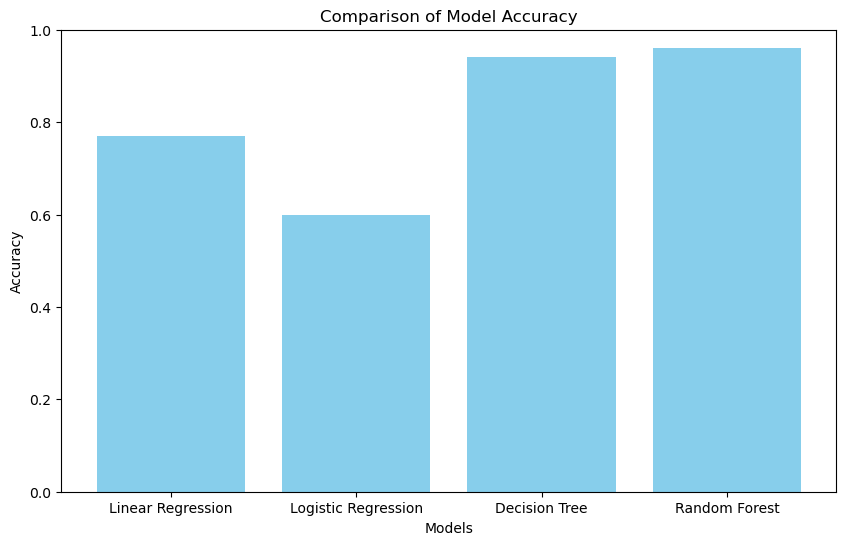

In [90]:
import matplotlib.pyplot as plt

# Model names
models = ['Linear Regression', 'Logistic Regression', 'Decision Tree','Random Forest']

# Accuracy scores
accuracy_scores = [0.77, 0.60, 0.94,0.96]  # Example accuracy scores

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color='skyblue')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1

# Show plot
plt.show()


In [86]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [91]:
# Initialize KFold with number of splits (K)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [92]:
# Initialize the model
lr = LogisticRegression()

# Perform K-fold cross-validation
cv_results = cross_val_score(lr, X, y, cv=kfold, scoring='accuracy')

# Print the results
print("Accuracy: %.2f%%" % (cv_results.mean()*100))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy: 60.31%


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
dt = tree.DecisionTreeClassifier()

# Perform K-fold cross-validation
cv_results = cross_val_score(dt, X, y, cv=kfold, scoring='accuracy')

# Print the results
print("Accuracy: %.2f%%" % (cv_results.mean()*100))


Accuracy: 94.59%


In [94]:
rf = RandomForestClassifier(n_estimators = 20)

# Perform K-fold cross-validation
cv_results = cross_val_score(rf, X, y, cv=kfold, scoring='accuracy')

# Print the results
print("Accuracy: %.2f%%" % (cv_results.mean()*100))

Accuracy: 96.67%


In [ ]:
svc = SVC()

# Perform K-fold cross-validation
cv_results = cross_val_score(svc, X, y, cv=kfold, scoring='accuracy')

# Print the results
print("Accuracy: %.2f%%" % (cv_results.mean()*100))